In [1]:
from torch import load
import numpy as np
import sys

sys.path.append('../..')

In [2]:
# If you haven't trained a model yet, please go to the file 'baryons_train.ipynb' first!
model = load('../../models/baryon_model_19.6gev.pt')
model.eval()

BaryonModel(
  (linear_in): Linear(in_features=71, out_features=71, bias=True)
  (linear_1): Linear(in_features=71, out_features=71, bias=True)
  (linear_2): Linear(in_features=71, out_features=71, bias=True)
  (leaky): LeakyReLU(negative_slope=0.01)
)

In [3]:
from hydroml.dataset import TrainDataset
from torch.utils.data import DataLoader

net_Baryons_19 = np.fromfile('../../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netBaryon.dat', dtype=np.float32)
net_Protons_19 = np.fromfile('../../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netProton.dat', dtype=np.float32)

net_Baryons_19 = net_Baryons_19.reshape( (len(net_Baryons_19) // 141, 141) )
net_Protons_19 = net_Protons_19.reshape( (len(net_Protons_19) // 141, 141) )[1:]

eta = net_Baryons_19[0]
net_Baryons_19 = net_Baryons_19[1:]

dataset_19 = TrainDataset(net_Baryons_19, net_Protons_19, eta, 3.5)

dataset = dataset_19

data_loader = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True,
)

print(len(data_loader))

5000


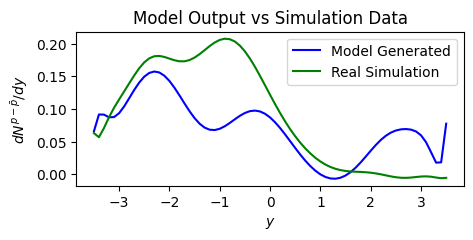

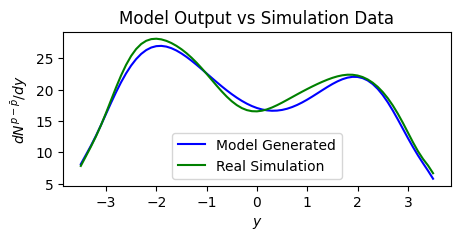

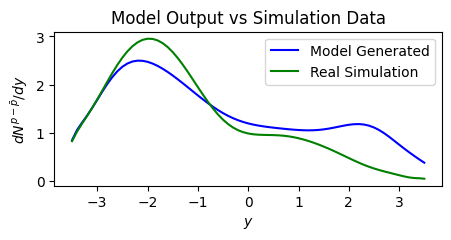

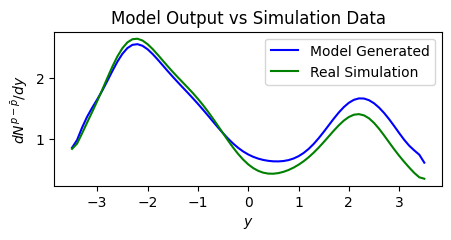

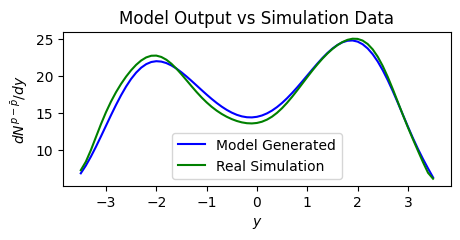

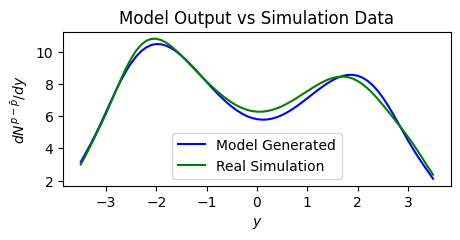

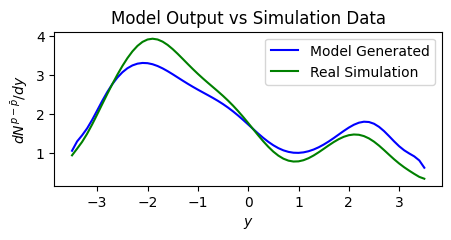

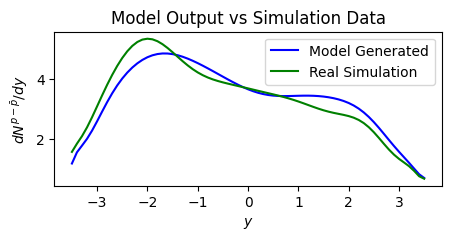

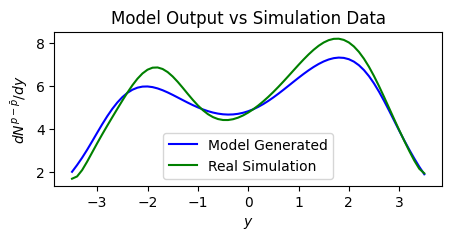

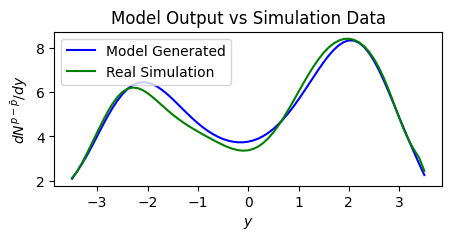

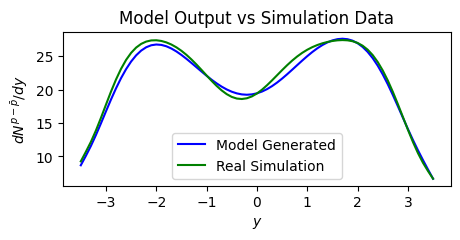

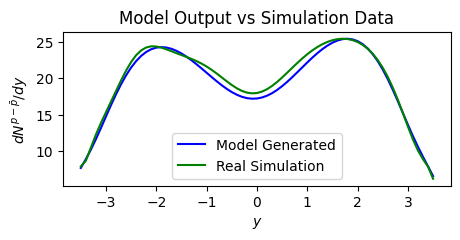

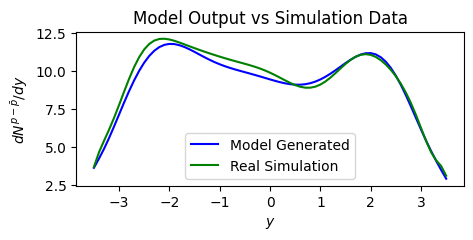

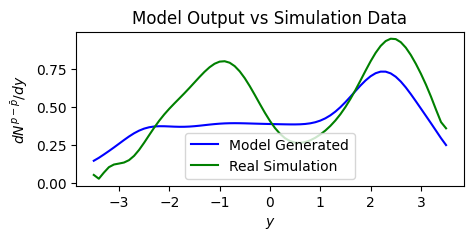

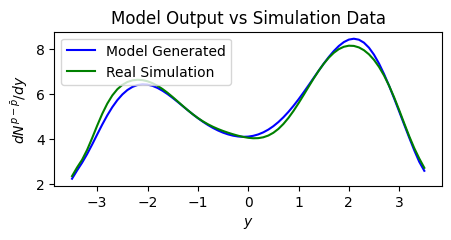

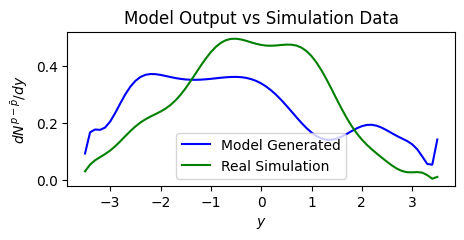

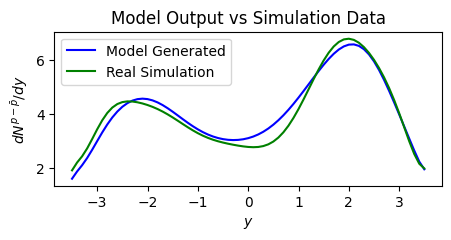

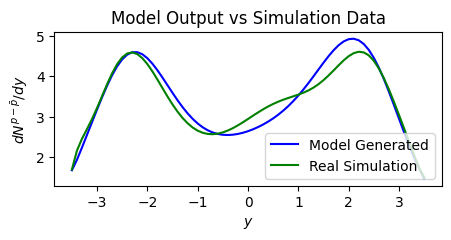

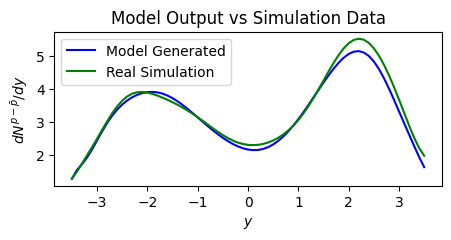

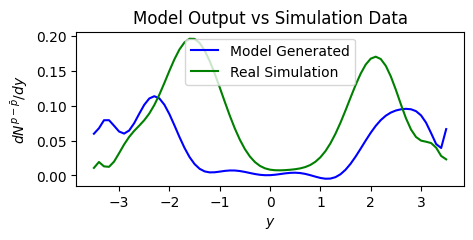

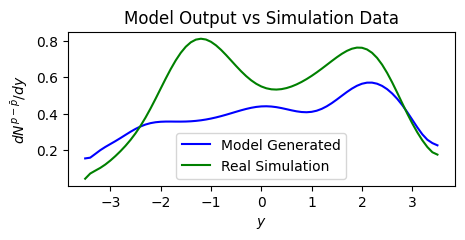

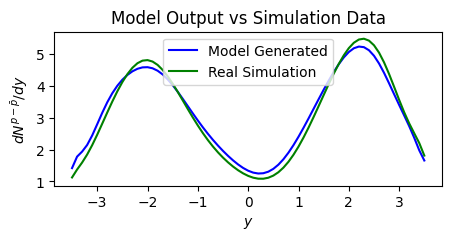

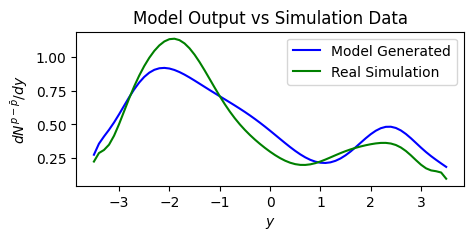

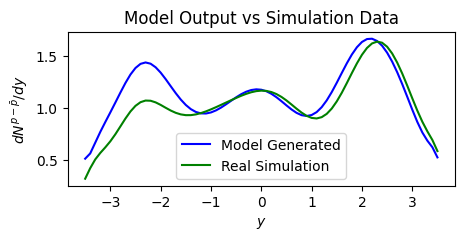

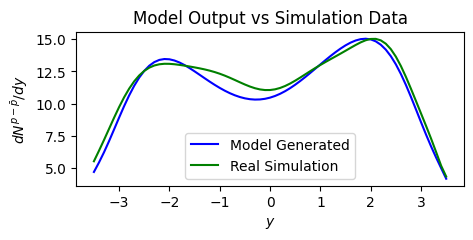

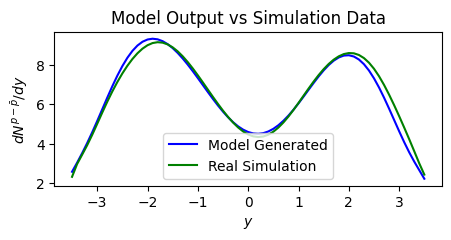

Values for actual final state
Mean: 22.893558502197266
Mean Error: 0.363362938086017
Standard Diviation: 25.691070556640625
Standard Error: 0.3633266041308527
Variance: 660.0310942957061 
Variance Error: 13.91605027694598
Skew: 1.1540292173937983
Skew Error: 7.226066242196923
Kurtosis: 3.222660686887746
Kurtosis Error: 88.92749840373608


Values for model output final state
Mean: 22.560937881469727
Mean Error: 0.3601517663262241
Standard Diviation: 25.46402931213379
Standard Error: 0.3601157560588564
Variance: 648.4167964667771 
Variance Error: 13.588773118046294
Skew: 1.1432986841548258
Skew Error: 7.069232093935496
Kurtosis: 3.1959477483884777
Kurtosis Error: 86.22493544765335


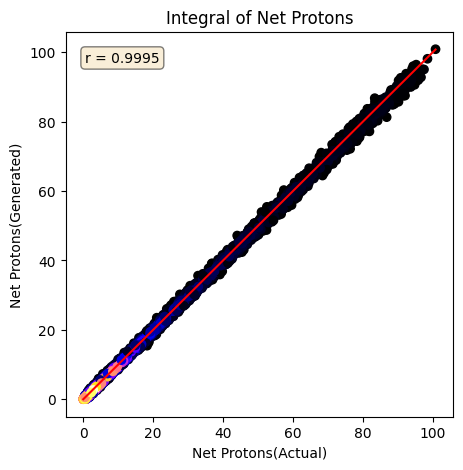

In [4]:
from hydroml.plot import plot_cc_graph, plot_output_compare, plot_output
from hydroml.moments import Moments
from hydroml.utils import trim, poly_regression, batch_poly_regression

finals = []
models = []
bound_1 = -2
bound_2 = 2

import numpy as np

for i, data in enumerate(data_loader):
    key = data[0]
    value = data[1].flatten()

    protons_model = model(key)

    protons_model = protons_model.detach().numpy().flatten()

    plot_output_compare(dataset.eta, poly_regression(dataset.eta, protons_model, 15), value)

    if i >= 25:
        break

for i, data in enumerate(data_loader):
    key = data[0]
    value = data[1].flatten()

    protons_model = model(key)

    protons_model = protons_model.detach().numpy().flatten()

    eta_trim, protons_trim = trim( dataset.eta, value, bound_1, bound_2  )
    _, protons_model_trim = trim( dataset.eta, protons_model, bound_1, bound_2  )
    protons_model_trim = poly_regression(eta_trim, protons_model_trim, 15)

    finals.append( np.trapz( protons_trim, x=eta_trim ) )
    models.append( np.trapz( protons_model_trim, x=eta_trim ) )

finals_moments = Moments(finals)
models_moments = Moments(models)

print("Values for actual final state")
print(finals_moments)
print("\n")
print("Values for model output final state")
print(models_moments)

plot_cc_graph(np.array(finals), np.array(models), "Net Protons")